**Informal Analysis of Twitter Usage Amidst the COVID-19 Pandemic**

**Name of the team members :**
- Aastha Shukla (304553771)
- Yugmi Bhatt (918182440)


**Introduction:**

The COVID-19 pandemic has had a big influence on civilization, generating social, economic, and political upheavals as well as worldwide health issues. Online discussion of the virus has grown significantly as the epidemic has spread, especially on social media sites like Twitter. To comprehend the causal linkages between the epidemic and Twitter debates and to extract significant insights, however, is challenging given the enormous volume of data that Twitter generates. To solve this issue, we suggest applying a causal topic modeling approach to determine the causal links between Twitter talks and the COVID-19 epidemic. This method integrates causal inference, which establishes the causal links between the themes and the epidemic, with topic modeling, which identifies the primary subjects covered in the Twitter data. For the purpose of creating successful treatments and communication techniques that are suited to the needs and viewpoints of various groups, it is essential to comprehend the social and cultural context of the epidemic and Twitter debates. For instance, public health workers and policymakers may create focused communications and treatments that cater to the particular needs and concerns of various groups of individuals using the insights garnered by causal topic modeling. The spread of knowledge and communication about the epidemic has been made easier by the development of digital technologies and social media sites like Twitter. However, utilizing the Twitter API to collect data poses ethical and privacy concerns. To address these, we will make sure that the data is collected and analyzed in an ethical and transparent manner and that best practices for data privacy and security are followed.


Installing all necessary packages:

In [106]:
! pip install nltk
! pip install gensim
! pip install string
! pip install re
! pip install tweepy
! pip install matplotlib
! pip install TextBlob
! pip install csv

You should consider upgrading via the 'c:\users\aasth\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\aasth\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string
You should consider upgrading via the 'c:\users\aasth\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
You should consider upgrading via the 'c:\users\aasth\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\aasth\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\aasth\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\aasth\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
You should consider upgrading via the 'c:\users\aasth\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Importing necessary libraries

In [107]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import tweepy
import gensim.downloader as api
from textblob import TextBlob
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from collections import Counter


The credentials required to use the Twitter API are contained in this collection of code. In order to authenticate and provide permission for an application to access Twitter's data on behalf of a user, the four variables each include sensitive data. While the access token and secret are used to identify and authenticate the user, the consumer key and secret are used to identify the application. To prevent unwanted access to the user's Twitter account and data, these credentials must be kept secret and safe.

In [108]:
consumer_key = 'QDSOD0qvG5AE7skDsega7HkeY'
consumer_secret = '9ybUtOloNk9C7m3OckSDj39r356ysT4W8Jbfsq9eY1WYFtfVKm'
access_token = '1259453588524408834-4zQyoBtECTnYru2OjyjyuFWCx8FSod'
access_token_secret = 'CJQkT8GTvdqCEEDNxWDTeTJGSlwVpBxEK8PNGDxKUDPnf'

Using the credentials that were previously established, this group of code is used to authenticate and create a connection to the Twitter API. A popular Python module for interacting with the Twitter API is called Tweepy. The consumer key and secret, as well as the access token and secret, are used to configure authentication using the OAuthHandler method. The Tweepy API object is then created using the API method so that it can be used to communicate with the Twitter API and obtain its data.


Reference : https://docs.tweepy.org/en/v3.5.0/auth_tutorial.html 


In [109]:
# Authenticate and connect to Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
api

Using the Tweepy API, this piece of code searches for tweets about COVID-19. "#COVID19" and "#Corona" are the search phrases in the query variable. The maximum number of tweets that will be returned is 1000 thanks to the max_tweets option. The complete text of each tweet that fits the search query will be added to the empty list in the searched_tweets variable. The for loop searches for tweets that match the supplied search query, language (English), and tweet_mode (extended) using the Tweepy Cursor technique. Each matching tweet's full_text attribute is added to the list of searched tweets. The final result is the searched_tweets list, which includes the entire text of up to 1000 tweets matching the search query.


In [110]:
# Search for COVID-19 related tweets
query = '#COVID19, #Corona'
max_tweets = 1000
searched_tweets = []

for tweet in tweepy.Cursor(api.search_tweets,
                           q=query,
                           lang="en",
                           tweet_mode='extended').items(max_tweets):
    searched_tweets.append(tweet.full_text)

searched_tweets

["#Corona Info for #USA:\nNew Cases: 6762\nToday Recovery: 36489\nToday Deaths: 96\nTotal Active Cases: 921546\nTotal Cases: 106611512\nTotal Recovery: 104530304\nTotal Deaths: 1159662\n#Coronavirus  #Covid19 #Covid_19 #SARSCoV2 #StaySafe \n\nSource: 'CoronaTrackerNepal_bot' #Telegram.",
 "#Corona Info for #USA:\nNew Cases: 3947\nToday Recovery: 27895\nToday Deaths: 39\nTotal Active Cases: 922643\nTotal Cases: 106603932\nTotal Recovery: 104521710\nTotal Deaths: 1159579\n#Coronavirus  #Covid19 #Covid_19 #SARSCoV2 #StaySafe \n\nSource: 'CoronaTrackerNepal_bot' #Telegram.",
 "#Corona Info for #USA:\nNew Cases: 2876\nToday Recovery: 17905\nToday Deaths: 21\nTotal Active Cases: 925814\nTotal Cases: 106597047\nTotal Recovery: 104511720\nTotal Deaths: 1159513\n#Coronavirus  #Covid19 #Covid_19 #SARSCoV2 #StaySafe \n\nSource: 'CoronaTrackerNepal_bot' #Telegram.",
 '@ChrisGriscom on the #corona #virus #COVID19: \nhttps://t.co/bDpocYu1I9',
 "#Corona Info for #USA:\nNew Cases: 2041\nToday Recovery

The preprocess_tweet function in this code removes URLs, mentions, non-alphanumeric characters, and stop words from tweets as part of its preprocessing operations. The tweet is then tokenized into a list of terms, and the token list is then returned. The code then uses a list comprehension to apply the preprocess_tweet function to each tweet in the searched_tweets list, creating a list of tokenized tweets that is kept in the tokens variable. In other words, the code breaks down each tweet's text into a list of individual words that may be used for additional research, deleting any extraneous information like URLs or stop words. This makes it easy to examine each tweet. The list of tokenized tweets that is produced can subsequently be utilized for tasks like topic modeling or sentiment analysis.

In [111]:
def preprocess_tweet(tweet):
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"@\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tokens = word_tokenize(tweet.lower())
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    return tokens

tokens = [preprocess_tweet(tweet) for tweet in searched_tweets]
tokens


[['corona',
  'info',
  'usa',
  'new',
  'cases',
  '6762',
  'today',
  'recovery',
  '36489',
  'today',
  'deaths',
  'total',
  'active',
  'cases',
  '921546',
  'total',
  'cases',
  '106611512',
  'total',
  'recovery',
  '104530304',
  'total',
  'deaths',
  '1159662',
  'coronavirus',
  'covid19',
  'covid_19',
  'sarscov2',
  'staysafe',
  'source',
  'coronatrackernepal_bot',
  'telegram'],
 ['corona',
  'info',
  'usa',
  'new',
  'cases',
  '3947',
  'today',
  'recovery',
  '27895',
  'today',
  'deaths',
  'total',
  'active',
  'cases',
  '922643',
  'total',
  'cases',
  '106603932',
  'total',
  'recovery',
  '104521710',
  'total',
  'deaths',
  '1159579',
  'coronavirus',
  'covid19',
  'covid_19',
  'sarscov2',
  'staysafe',
  'source',
  'coronatrackernepal_bot',
  'telegram'],
 ['corona',
  'info',
  'usa',
  'new',
  'cases',
  '2876',
  'today',
  'recovery',
  '17905',
  'today',
  'deaths',
  'total',
  'active',
  'cases',
  '925814',
  'total',
  'cases',


This code generates a corpus and dictionary that will be used in the topic modeling technique known as LDA (Latent Dirichlet Allocation). Using the collection of tokenized tweets, the dictionary function generates a mapping from each distinct word to a distinct integer ID that will be used in the LDA model. The dictionary object's doc2bow method then transforms each tweet into a bag of words, where each word is represented by its integer ID and the frequency with which it appears in the tweet. The corpus that is produced is a collection of bag-of-words representations for each tweet, which can be used as input for the LDA model to determine the primary subjects discussed in the tweets.


In [112]:
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(tokens) for tokens in tokens]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 3),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 4),
  (23, 1)],
 [(6, 1),
  (7, 3),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 4),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(6, 1),
  (7, 3),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 4),
  (23, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(8, 1), (11, 1), (36, 1)],
 [(6, 1),
  (7, 3),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 4),
  (23, 1),


With the help of the corpus and dictionary that were produced in the previous steps, this code trains an LDA (Latent Dirichlet Allocation) model. The LdaModel function trains an LDA model to recognize the primary topics included in the tweets using the corpus, dictionary, number of topics (num_topics), and number of iterations (num_passes) as input. The trained LDA model is contained in the resultant lda_model object, and it can be used to extract the key themes from the tweets about COVID-19 that were gathered via the Twitter API.


In [113]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda_model

The subjects and their top words from the LDA model are saved using this code into a CSV file. The writer object is created using the csv module, and the file is opened in write mode. The words are extracted, cleaned, and saved as a row in the file for each subject. Finally, a notification stating that the outcomes have been stored is printed.

In [114]:
filename_1 = 'topics.csv'
with open(filename_1, mode='w', encoding='utf-8') as file:
    writer = csv.writer(file)
    for idx, topic in lda_model.print_topics(-1):
        words = topic.split('+')
        words = [word.split('*')[1].replace('"', '').strip() for word in words]
        writer.writerow([f'Topic {idx}'] + words)

print(f"Saved results to {filename_1}")

Saved results to topics.csv


Using the TextBlob library, we define two functions in this code to determine the sentiment polarity and subjectivity ratings for each tweet. The tweets and sentiment scores are then saved to a CSV file called "tweet_sentiments.csv." The preprocess_tweet function is used to preprocess each tweet as we cycle through the searched_tweets list, and the TextBlob routines are used to determine the sentiment ratings for each tweet. Following that, we add the tweet and its sentiment scores to a list named sentiment_scores and use the csv.writer to publish the same data to the CSV file. Finally, we print a message stating that the CSV file with the results has been created.

In [115]:
# Compute sentiment polarity score for each tweet
def get_sentiment_polarity(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity

# Compute sentiment subjectivity score for each tweet
def get_sentiment_subjectivity(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.subjectivity

# Save tweets and sentiment scores (polarity+subjectivity) to CSV file
filename = "tweet_sentiments.csv"

with open(filename, "w", encoding='utf-8') as file:
    # Perform sentiment analysis
    sentiment_scores = []
    writer = csv.writer(file)
    writer.writerow(["Tweet", "Polarity", "Subjectivity"])

    for tweet in searched_tweets:
        tokens = preprocess_tweet(tweet)
        sentiment_polarity = get_sentiment_polarity(tweet)
        sentiment_subjectivity = get_sentiment_subjectivity(tweet)
        sentiment_scores.append({'tweet': tweet, 'polarity': sentiment_polarity, 'subjectivity': sentiment_subjectivity})
        writer.writerow([tweet, sentiment_polarity, sentiment_subjectivity])

print(f"Saved results to {filename}")

Saved results to tweet_sentiments.csv


This code loads sentiment scores from a CSV file before using Matplotlib to make two histograms. The emotion polarity scores, which range from -1 (most negatively) to 1, are displayed in the first histogram. The distribution of sentiment subjectivity ratings, which range from 0 (most objective) to 1 (most subjective), is displayed in the second histogram. We can determine the general tone of the tweets and the degree of subjectivity or objectivity in them by examining these histograms.


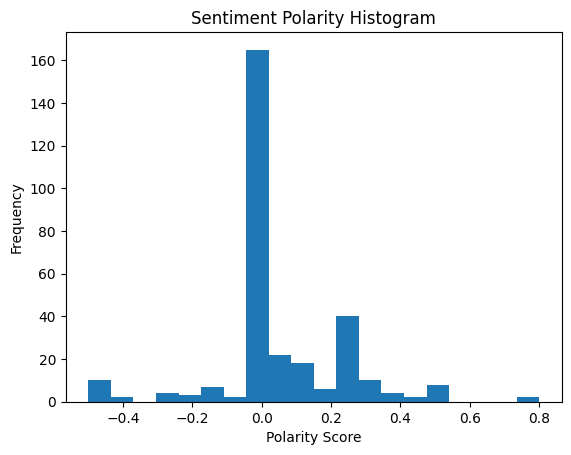

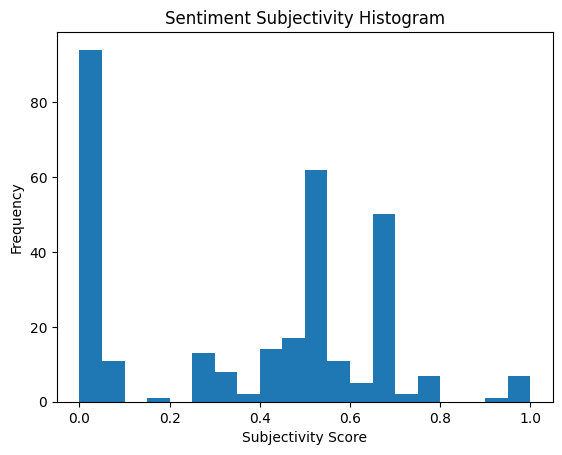

In [116]:
with open(filename, "r", encoding='utf-8') as file:
    reader = csv.DictReader(file)
    sentiment_scores = [{'tweet': row['Tweet'], 'polarity': float(row['Polarity']), 'subjectivity': float(row['Subjectivity'])} for row in reader]
polarity_scores = [score['polarity'] for score in sentiment_scores]
plt.hist(polarity_scores, bins=20)
plt.title('Sentiment Polarity Histogram')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()
subjectivity_scores = [score['subjectivity'] for score in sentiment_scores]
plt.hist(subjectivity_scores, bins=20)
plt.title('Sentiment Subjectivity Histogram')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.show()

A scatter plot of the sentiment polarity versus sentiment subjectivity for each tweet in the dataset is then produced using the sentiment scores loaded from a CSV file. The plt.scatter() function is used to extract the polarity and subjectivity scores from the sentiment_scores list and plot them. The generated plot shows the correlation between the two sentiment indicators graphically. The polarity score is represented by the x-axis, with negative values on the left and positive values on the right, while the subjectivity score is represented by the y-axis, with objective values at the bottom and subjective values at the top. The plot enables us to spot any sentimental patterns or trends in the tweets.


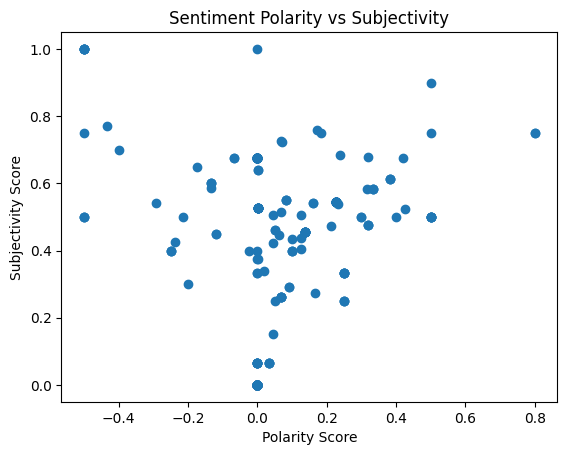

In [117]:
with open(filename, "r", encoding='utf-8') as file:
    reader = csv.DictReader(file)
    sentiment_scores = [{'tweet': row['Tweet'], 'polarity': float(row['Polarity']), 'subjectivity': float(row['Subjectivity'])} for row in reader]
polarity_scores = [score['polarity'] for score in sentiment_scores]
subjectivity_scores = [score['subjectivity'] for score in sentiment_scores]
plt.scatter(polarity_scores, subjectivity_scores)
plt.title('Sentiment Polarity vs Subjectivity')
plt.xlabel('Polarity Score')
plt.ylabel('Subjectivity Score')
plt.show()


The method mentioned above generates a list sentiment_scores with a dictionary for each row after reading the sentiment scores CSV file. The tweets are then extracted from each of the dictionaries and added to a list called tweet_array. Finally, the tweet_array list is printed.

In [118]:
tweet_array = []
with open('tweet_sentiments.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    sentiment_scores = [{'tweet': row['Tweet'], 'polarity': float(row['Polarity']), 'subjectivity': float(row['Subjectivity'])} for row in reader]
    for sentiment in sentiment_scores:
        tweet_array.append(sentiment['tweet'])
print(tweet_array)

["#Corona Info for #USA:\nNew Cases: 6762\nToday Recovery: 36489\nToday Deaths: 96\nTotal Active Cases: 921546\nTotal Cases: 106611512\nTotal Recovery: 104530304\nTotal Deaths: 1159662\n#Coronavirus  #Covid19 #Covid_19 #SARSCoV2 #StaySafe \n\nSource: 'CoronaTrackerNepal_bot' #Telegram.", "#Corona Info for #USA:\nNew Cases: 3947\nToday Recovery: 27895\nToday Deaths: 39\nTotal Active Cases: 922643\nTotal Cases: 106603932\nTotal Recovery: 104521710\nTotal Deaths: 1159579\n#Coronavirus  #Covid19 #Covid_19 #SARSCoV2 #StaySafe \n\nSource: 'CoronaTrackerNepal_bot' #Telegram.", "#Corona Info for #USA:\nNew Cases: 2876\nToday Recovery: 17905\nToday Deaths: 21\nTotal Active Cases: 925814\nTotal Cases: 106597047\nTotal Recovery: 104511720\nTotal Deaths: 1159513\n#Coronavirus  #Covid19 #Covid_19 #SARSCoV2 #StaySafe \n\nSource: 'CoronaTrackerNepal_bot' #Telegram.", '@ChrisGriscom on the #corona #virus #COVID19: \nhttps://t.co/bDpocYu1I9', "#Corona Info for #USA:\nNew Cases: 2041\nToday Recovery: 49

This collection of code reads the CSV file containing sentiment scores for each tweet, generates a list of the tweets, then divides the tweets into positive, neutral, and negative categories based on their polarity ratings. The TextBlob library is used to calculate the sentiment polarity score. A tweet is deemed positive if the polarity score is greater than 0, neutral if the polarity score is equal to 0, and negative if the polarity score is less than 0. The code then outputs the quantity of tweets in each category.


In [119]:
positive_tweets = []
neutral_tweets = []
negative_tweets = []

with open('tweet_sentiments.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    sentiment_scores = [{'tweet': row['Tweet'], 'polarity': float(row['Polarity']), 'subjectivity': float(row['Subjectivity'])} for row in reader]
    for sentiment in sentiment_scores:
        tweet_array.append(sentiment['tweet'])

for tweet in tweet_array:
    blob = TextBlob(tweet)
    polarity_score = blob.sentiment.polarity

    if polarity_score > 0:
        positive_tweets.append(tweet)
    elif polarity_score == 0:
        neutral_tweets.append(tweet)
    else:
        negative_tweets.append(tweet)

print(f"Number of Positive Tweets: {len(positive_tweets)}")
print(f"Number of Neutral Tweets: {len(neutral_tweets)}")
print(f"Number of Negative Tweets: {len(negative_tweets)}")


Number of Positive Tweets: 340
Number of Neutral Tweets: 212
Number of Negative Tweets: 58


Based on the primary mood and sentiment polarity of each tweet, this code classifies them. Each tweet's sentiment score is determined using the NLTK VADER (Valence Aware Dictionary and Sentiment Reasoner) sentiment analyzer. Additionally, it specifies four categories of emotions (fear, happiness, sorrow, and neutral) and gives each one a set of keywords. The code determines which emotion will be the dominant emotion for the tweet based on whether any of the emotion's linked terms are present in the tweet. The code uses the VADER sentiment ratings to determine the dominating emotion if no keyword is identified. The code then builds a pie chart to show the distribution of tweets across emotions and outputs the number of tweets in each category of emotion.

Fear: 292
Happiness: 4
Sorrow: 0
Neutral: 9


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


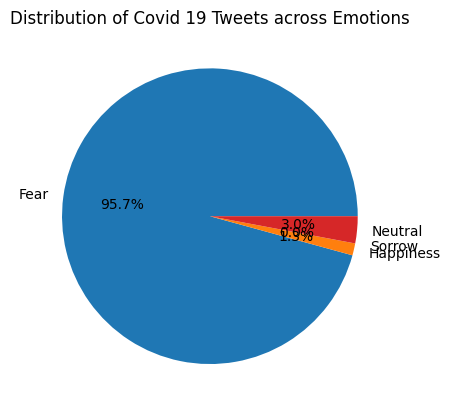

In [120]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
emotion_categories = {
    'fear': {'keywords': ["covid", "pandemic", "virus", "lockdown", "quarantine", "isolation", "symptoms", "death", "uncertainty"], 'count': 0},
    'happiness': {'keywords': ["vaccine", "hope", "recovery", "community", "support", "gratitude", "positivity", "innovation"], 'count': 0},
    'sorrow': {'keywords': ["loss", "grief", "mourning", "death", "isolation", "distress", "trauma", "loneliness"], 'count': 0},
    'neutral': {'keywords': [], 'count': 0}
}
tweet_sentiments = []
with open('tweet_sentiments.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        tweet_sentiments.append({'tweet': row['Tweet'], 'polarity': float(
            row['Polarity']), 'subjectivity': float(row['Subjectivity'])})

for tweet in tweet_sentiments:
    sentiment_scores = sid.polarity_scores(tweet['tweet'])
    dominant_emotion = None
    for emotion in emotion_categories.keys():
        keywords = emotion_categories[emotion]['keywords']
        if any(keyword in tweet['tweet'].lower() for keyword in keywords):
            dominant_emotion = emotion
            break
    if dominant_emotion is None:
        if sentiment_scores['compound'] >= 0.05:
            dominant_emotion = 'happiness'
        elif sentiment_scores['compound'] <= -0.05:
            dominant_emotion = 'sorrow'
        else:
            dominant_emotion = 'neutral'
    emotion_categories[dominant_emotion]['count'] += 1

for emotion in emotion_categories.keys():
    print(emotion.capitalize() + ': ' +
          str(emotion_categories[emotion]['count']))

emotion_counts = [emotion_categories[emotion]['count']
                  for emotion in emotion_categories.keys()]
emotion_labels = [emotion.capitalize()
                  for emotion in emotion_categories.keys()]

plt.pie(emotion_counts, labels=emotion_labels, autopct='%1.1f%%')
plt.title('Distribution of Covid 19 Tweets across Emotions:')
plt.show()
